In [1]:
import pandas as pd 

train1=pd.read_csv("ml-100k/u1.base",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )


#import sys
#sys.getsizeof(train1)
print(train1.rating.unique())
train1.describe()

[5 3 4 1 2]


,user,item,rating,time
count,80000.00000,80000.000000,80000.000000,8.000000e+04
mean,525.16570,425.705200,3.528350,8.835645e+08
std,255.94956,331.383936,1.118565,5.318611e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,334.00000,175.000000,3.000000,8.794556e+08
50%,535.00000,321.000000,4.000000,8.828441e+08
75%,744.00000,631.000000,4.000000,8.882676e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [2]:
avg=train1.rating.mean()
print(avg)
train1.head()

3.52835


,user,item,rating,time
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [3]:
#train1_avg0=train1.copy()
train1['rating_1']=train1.rating-avg
print(train1.rating_1.mean())
train1.head()

7.105427357601002e-19


,user,item,rating,time,rating_1
0,1,1,5,874965758,1.47165
1,1,2,3,876893171,-0.52835
2,1,3,4,878542960,0.47165
3,1,4,3,876893119,-0.52835
4,1,5,3,889751712,-0.52835


In [4]:
b_i=train1.groupby("item").rating_1.mean()
b_u=train1.groupby("user").rating_1.mean()
print(b_i.head())
print(b_u.head())

item
1    0.364600
2   -0.347398
3   -0.528350
4   -0.002034
5   -0.224002
Name: rating_1, dtype: float64
user
1    0.153131
2    0.271650
3   -0.528350
4    0.828793
5   -0.572306
Name: rating_1, dtype: float64


In [5]:
#this is in general non-zero ?
print(b_i.mean())
print(b_u.mean())

-0.42767757484871066
0.060530437258945


In [6]:
train1['b_i'] = train1.apply(lambda x: b_i.loc[x['item']],axis=1)
train1['b_u'] = train1.apply(lambda x: b_u.loc[x['user']],axis=1)

In [7]:
#predictged score mu+b_u+b_i
train1['mu_bu_bi']=avg+train1['b_i']+train1['b_u']
#residual: true_score - mu - b_u - b_i
train1['rating_2']=train1['rating_1']-train1['b_i']-train1['b_u']
train1.head(10)

,user,item,rating,time,rating_1,b_i,b_u,mu_bu_bi,rating_2
0,1,1,5,874965758,1.47165,0.364600,0.153131,4.046082,0.953918
1,1,2,3,876893171,-0.52835,-0.347398,0.153131,3.334084,-0.334084
2,1,3,4,878542960,0.47165,-0.528350,0.153131,3.153131,0.846869
3,1,4,3,876893119,-0.52835,-0.002034,0.153131,3.679447,-0.679447
4,1,5,3,889751712,-0.52835,-0.224002,0.153131,3.457479,-0.457479
5,1,7,4,875071561,0.47165,0.269696,0.153131,3.951177,0.048823
6,1,8,1,875072484,-2.52835,0.465870,0.153131,4.147351,-3.147351
7,1,9,5,878543541,1.47165,0.304983,0.153131,3.986465,1.013535
8,1,11,2,875072262,-1.52835,0.322932,0.153131,4.004414,-2.004414
9,1,13,5,875071805,1.47165,-0.117902,0.153131,3.563579,1.436421


In [9]:
import numpy as np 
from sklearn.metrics import mean_squared_error as mse
print(mse(train1['rating'],train1['mu_bu_bi']))
print(mse(train1['rating_2'],np.zeros(len(train1))))

0.8691740892312809
0.8691740892312809


### test

In [10]:
test1=pd.read_csv("ml-100k/u1.test",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )

test1.head()

,user,item,rating,time
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [11]:
#get returns 0 if user is not in index
test1['b_i'] = test1.apply(lambda x: b_i.get(x['item'],0),axis=1)
test1['b_u'] = test1.apply(lambda x: b_u.get(x['user'],0),axis=1)

In [211]:
#predicts score by summing total average, user average and item average
test1['mu_bu_bi']=avg+test1['b_i']+test1['b_u']
test1['rating_2']=test1['rating']-avg-test1['b_i']-test1['b_u']
test1['rating_1']=test1['rating']-avg
test1.head(10)

,user,item,rating,time,b_i,b_u,mu_bu_bi,rating_2,train,rating_1
0,1,6,5,887431973,-0.128350,0.153131,3.553131,1.446869,0,1.47165
1,1,10,3,875693118,0.348362,0.153131,4.029844,-1.029844,0,-0.52835
2,1,12,5,878542960,0.869754,0.153131,4.551236,0.448764,0,1.47165
3,1,14,5,874965706,0.371650,0.153131,4.053131,0.946869,0,1.47165
4,1,17,3,875073198,-0.347794,0.153131,3.333687,-0.333687,0,-0.52835
5,1,20,4,887431883,-0.056652,0.153131,3.624830,0.375170,0,0.47165
6,1,23,4,875072895,0.548083,0.153131,4.229565,-0.229565,0,0.47165
7,1,24,3,875071713,-0.131291,0.153131,3.550190,-0.550190,0,-0.52835
8,1,27,2,876892946,-0.348350,0.153131,3.333131,-1.333131,0,-1.52835
9,1,31,3,875072144,0.124876,0.153131,3.806357,-0.806357,0,-0.52835


In [207]:
print(mse(train1['rating'],train1['mu_bu_bi']))
print(mse(test1['rating'],test1['mu_bu_bi']))
print(mse(test1['rating_2'],np.zeros(len(test1))))

0.8691740892312809
0.9607495517918387
1.3309681924999999


In [208]:
train1['train']=1
test1['train']=0
df_total=pd.concat([train1,test1])
#df_total

## SVD

In [179]:
import scipy.sparse as sp

import numpy as np
#these are the ratings, read as a sparse matrix, with index starting from zero, hence the -1
user_item_0=sp.coo_matrix((np.array(train1["rating"].astype('float')),(np.array(train1["user"]-1),np.array(train1["item"]-1))))
user_item_1=sp.coo_matrix((np.array(train1["rating_1"]),(np.array(train1["user"]-1),np.array(train1["item"]-1))))
user_item_2=sp.coo_matrix((np.array(train1["rating_2"]),(np.array(train1["user"]-1),np.array(train1["item"]-1))))


#these are if there is a rating
#user_item_n=scipy.sparse.coo_matrix((np.ones(len(df)),(np.array(df["user"]-1),np.array(df["item"]-1))))

print(user_item_2.getnnz())
print(user_item_2.count_nonzero())
#print(user_item_n.count_nonzero())
print(user_item_2.shape)
#print(user_item_n.shape)

80000
80000
(943, 1682)


In [180]:
n_1,n_2=user_item_2.shape
size_min=min(n_1,n_2)
size_min

943

In [181]:
import scipy.sparse.linalg as spl
U,s,VT=spl.svds(user_item_0,k=size_min-1)

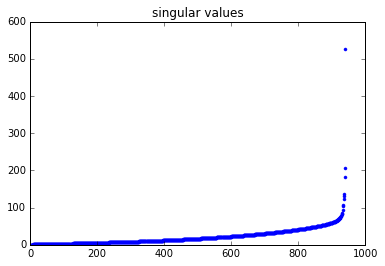

In [182]:
import matplotlib.pyplot as plt
plt.plot(s,'.')
plt.title('singular values')

In [183]:
#from the reconstructed array, extract only elements that correspond to the training set
ind_i=np.array(train1["user"]-1)
ind_j=np.array(train1["item"]-1)
#values_ij=np.array([rec_array[i,j] for i,j in zip(ind_i,ind_j)])
#rec_array_sparse=sp.coo_matrix((values_ij,(ind_i,ind_j)))
#mse(values_ij,train1['rating_2'])


In [186]:
#rec_array=np.dot(U, np.dot(S, VT))
#train1['rating_svd']=train1.apply(lambda x: rec_array[int(x['user']-1),int(x['item']-1)],axis=1)
#train1.head()

In [25]:
#using all SVD values I represent the matrix exactly
#rating_2 is rating -mu-b_i-b_u, to which I apply the SVD procedure
#mse(train1['rating_svd'],train1['rating_2'])

In [192]:
error=[]
ind_i=np.array(train1["user"]-1)
ind_j=np.array(train1["item"]-1)
for size in range(1,size_min-1,10):
    print(size)
    U,s,VT=spl.svds(user_item_0,k=size)
    S = np.diag(s)
    rec_array=np.dot(U, np.dot(S, VT))
    values_ij=np.array([rec_array[i,j] for i,j in zip(ind_i,ind_j)])
    #rec_array_sparse=sp.coo_matrix((values_ij,(ind_i,ind_j)))
    #train1['rating_svd']=train1.apply(lambda x: rec_array[int(x['user']-1),int(x['item']-1)],axis=1)
    error.append(mse(values_ij,train1['rating_2']))
    #error.append(mse(user_item_2.toarray()))

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261


KeyboardInterrupt: 

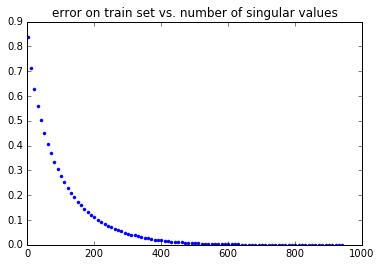

In [27]:
plt.plot(range(1,size_min-1,10),error,'.')
plt.title('error on train set vs. number of singular values')

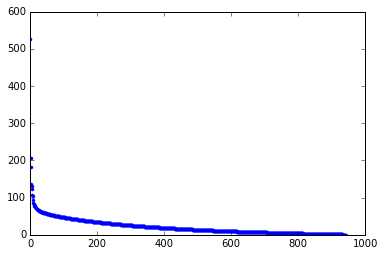

In [193]:
#here I use the routine for full matrices
U, s, VT = np.linalg.svd(user_item_0.toarray(), full_matrices=False)
plt.plot(s,'.');

In [198]:
error2=[]
ind_i=np.array(train1["user"]-1)
ind_j=np.array(train1["item"]-1)
for size in range(0,size_min-1,10):
    print(size)
    S = np.diag(s[:size])
    rec_array=np.dot(U[:,:size], np.dot(S, VT[:size,:]))
    values_ij=np.array([rec_array[i,j] for i,j in zip(ind_i,ind_j)])
    error2.append(mse(values_ij,train1['rating']))
    #diff=user_item_2.toarray()- np.dot(U[:,:size], np.dot(S, VT[:size,:]))
    #error2.append(np.linalg.norm(diff))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940


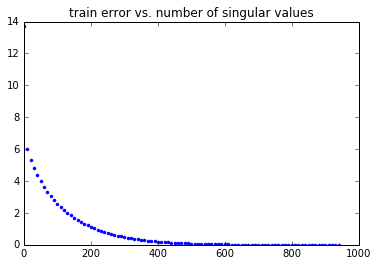

In [200]:
plt.plot(range(0,size_min-1,10),error2,'.')
#plt.plot(range(1,size_min-1,10),error,'.')
plt.title('train error vs. number of singular values');

### SVD for test set

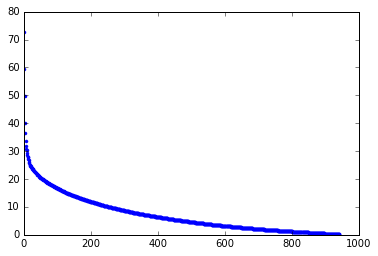

In [209]:
#here I use the routine for full matrices
U, s, VT = np.linalg.svd(user_item_1.toarray(), full_matrices=False)
plt.plot(s,'.')

In [212]:
ind_i=np.array(test1["user"]-1)
ind_j=np.array(test1["item"]-1)
error3=[]
for size in range(0,100):
    print(size)
    S = np.diag(s[:size])
    rec_array=np.dot(U[:,:size], np.dot(S, VT[:size,:]))
    values_ij=np.array([rec_array[i,j] for i,j in zip(ind_i,ind_j)])
    error3.append(mse(values_ij,test1['rating_1']))
    #diff=user_item_2.toarray()- np.dot(U[:,:size], np.dot(S, VT[:size,:]))
    #error2.append(np.linalg.norm(diff))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


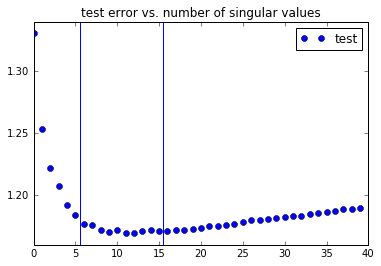

In [213]:
plt.plot(range(0,40),error3[:40],'o',label='test')
#plt.plot(range(0,40),error2[:40],'.',label='train')
#plt.plot(range(1,size_min-1,10),error,'.')
plt.title('test error vs. number of singular values')
plt.legend();
plt.axvline(5.5)
plt.axvline(15.5)

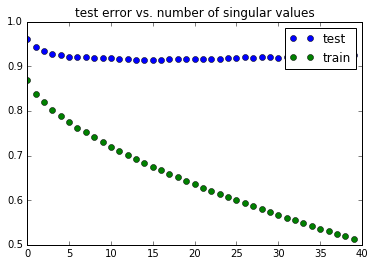

In [34]:
plt.plot(range(0,40),error3[:40],'o',label='test')
plt.plot(range(0,40),error2[:40],'o',label='train')
#plt.plot(range(1,size_min-1,10),error,'.')
plt.title('test error vs. number of singular values')
plt.legend();

So, ~15 singular values is the best choice, even though 5 might be better after regularization, since you do not gain much from 5 to 15

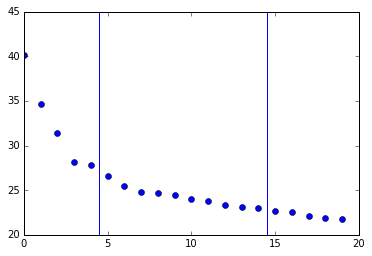

In [35]:
plt.plot(s[:20],'o');
plt.axvline(4.5)
plt.axvline(14.5)

## Surprise 

In [36]:
from surprise import SVD
from surprise import Dataset
from surprise import evaluate, print_perf
from surprise.prediction_algorithms.random_pred import NormalPredictor
from surprise.prediction_algorithms.baseline_only import BaselineOnly

In [265]:
 Dataset.load_builtin?

In [270]:
data = Dataset.load_builtin('ml-100k')
#data = Dataset.load_builtin('ml-1m')
data.split(n_folds=4)

In [38]:
import surprise
surprise.model_selection.search.GridSearchCV?

In [39]:
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import scipy
import numpy as np
import surprise

params={'n_factors':(200,300,400),
 #      'n_epochs':(10,50,100),
      # 'biased':(True,False),
       'lr_all':(0.02,0.04,0.06),
       'reg_all':(0.05,0.1,0.2)}

grid=surprise.model_selection.search.GridSearchCV(SVD, params,cv=4 measures=['rmse','fcp'], n_jobs=1, joblib_verbose=10,refit=True)
grid.fit(data)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   36.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   41.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  7.2min finished


In [161]:
print(grid.best_score)
grid.best_params

{'rmse': 0.9341772715478418, 'fcp': 0.7145271445328556}


{'fcp': {'lr_all': 0.02, 'n_factors': 400, 'reg_all': 0.1},
 'rmse': {'lr_all': 0.02, 'n_factors': 300, 'reg_all': 0.1}}

In [162]:
SVD?

In [163]:
params3={'n_factors':(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50,60,70,80,90,100,150,200,300,400,500),
 #      'n_epochs':(10,50,100),
      # 'biased':(True,False),
     #  'lr_all':(0.005,),
       'reg_all':(0,)}

grid3=surprise.model_selection.search.GridSearchCV(SVD, params3,cv=4, measures=['rmse','fcp'], n_jobs=1, joblib_verbose=10,refit=True)
grid3.fit(data)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 116 out of 116 | elapsed:  7.6min finished


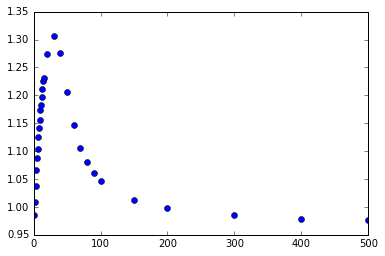

In [58]:
plt.plot(grid3.cv_results['param_n_factors'],grid3.cv_results['mean_test_rmse'],'o')

In [59]:
grid3.cv_results

{'mean_fit_time': array([ 0.7477653 ,  0.82153487,  0.9382602 ,  0.85085738,  0.86140013,
         0.8816781 ,  0.97905946,  1.00105667,  0.96009636,  0.97875822,
         0.96892071,  1.02398252,  1.02763402,  1.05145168,  1.06203091,
         1.15049279,  1.42831397,  1.59495449,  1.65917504,  1.86418533,
         1.96378875,  2.18324232,  2.5254308 ,  2.54041183,  3.32049155,
         4.10180628,  6.58411086, 10.31813014, 13.79246509]),
 'mean_test_fcp': array([0.69558442, 0.68874808, 0.67926695, 0.67380542, 0.66611311,
        0.66077287, 0.65839952, 0.65281595, 0.64961487, 0.64430834,
        0.6427818 , 0.64204419, 0.63494977, 0.63267841, 0.62827185,
        0.61520419, 0.60494597, 0.60100423, 0.61300395, 0.62299104,
        0.6328463 , 0.63881194, 0.64558201, 0.65007712, 0.65997554,
        0.66762121, 0.66961186, 0.67560708, 0.67692923]),
 'mean_test_rmse': array([0.98590133, 1.00867608, 1.03818619, 1.0654375 , 1.08678798,
        1.1032069 , 1.12547625, 1.1412519 , 1.15622236,

In [41]:
from surprise import KNNBasic
params2={'k':(20,30,40,50,70,100),
       'min_k':(1,2,3,4,5),}

grid2=surprise.model_selection.search.GridSearchCV(KNNBasic, params2,cv=2, measures=['rmse','fcp'], n_jobs=1, joblib_verbose=10,refit=True)
grid2.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


Computing the msd similarity matrix...


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


Done computing similarity matrix.
Computing the msd similarity matrix...


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.0s remaining:    0.0s


Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.2s remaining:    0.0s


Computing the msd similarity matrix...


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.8s remaining:    0.0s


Done computing similarity matrix.
Computing the msd similarity matrix...


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.3s remaining:    0.0s


Done computing similarity matrix.
Computing the msd similarity matrix...


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   37.1s remaining:    0.0s


Done computing similarity matrix.
Computing the msd similarity matrix...


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   43.2s remaining:    0.0s


Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   49.3s remaining:    0.0s


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  5.6min finished


Computing the msd similarity matrix...
Done computing similarity matrix.


In [164]:
print(grid2.best_score)
grid2.best_params

{'rmse': 1.0021961063072742, 'fcp': 0.7080452097606897}


{'fcp': {'k': 50, 'min_k': 1}, 'rmse': {'k': 30, 'min_k': 2}}

In [ ]:
classes = (SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline,
CoClustering, BaselineOnly, NormalPredictor)


table = []
for klass in classes:
    start = time.time()
    out = cross_validate(klass(), data, ['rmse', 'mae'], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[klass.__name__]
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    mean_mae = '{:.3f}'.format(np.mean(out['test_mae']))

    new_line = [link, mean_rmse, mean_mae, cv_time]
    print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

header = [LINK[dataset],
          'RMSE',
          'MAE',
          'Time'
          ]
print(tabulate(table, header, tablefmt="pipe"))

In [103]:
data.split(n_folds=4)

In [104]:
import surprise
algo1 = SVD()

# Evaluate performances of our algorithm on the dataset.
perf1 = surprise.evaluate(algo1, data, measures=['RMSE', 'MAE','FCP'])

/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE, FCP of algorithm SVD.

------------
Fold 1
RMSE: 0.9430
MAE:  0.7426
FCP:  0.7022
------------
Fold 2
RMSE: 0.9404
MAE:  0.7423
FCP:  0.6994
------------
Fold 3
RMSE: 0.9388
MAE:  0.7423
FCP:  0.7016
------------
Fold 4
RMSE: 0.9415
MAE:  0.7424
FCP:  0.7004
------------
------------
Mean RMSE: 0.9409
Mean MAE : 0.7424
Mean FCP : 0.7009
------------
------------


In [105]:
algo3 = BaselineOnly()

# Evaluate performances of our algorithm on the dataset.
perf3 = evaluate(algo3, data, measures=['RMSE', 'MAE','FCP'])

print_perf(perf3)

/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.9493
MAE:  0.7518
FCP:  0.6976
------------
Fold 2
Estimating biases using als...
RMSE: 0.9425
MAE:  0.7468
FCP:  0.7018
------------
Fold 3
Estimating biases using als...
RMSE: 0.9438
MAE:  0.7505
FCP:  0.7004
------------
Fold 4
Estimating biases using als...
RMSE: 0.9464
MAE:  0.7496
FCP:  0.6983
------------
------------
Mean RMSE: 0.9455
Mean MAE : 0.7497
Mean FCP : 0.6995
------------
------------
        Fold 1  Fold 2  Fold 3  Fold 4  Mean    
RMSE    0.9493  0.9425  0.9438  0.9464  0.9455  
FCP     0.6976  0.7018  0.7004  0.6983  0.6995  
MAE     0.7518  0.7468  0.7505  0.7496  0.7497  


## implement pure SVD in surprise (no regularization)

In [271]:
from surprise import AlgoBase
from surprise import Dataset
from surprise.model_selection import cross_validate

class poorman_SVD(AlgoBase):

    def __init__(self,n_factors=10,biased=True,verbose=True,NMF=False):

        # Always call base method before doing anything.
        AlgoBase.__init__(self)
        self.k=n_factors
        self.biased=biased
        self.verbose=verbose
        self.do_NMF=NMF
        if(self.do_NMF): self.biased=False

    def fit(self, trainset):

        # Here again: call base method before doing anything.
        AlgoBase.fit(self, trainset)
        
        import numpy as np
        from  scipy.sparse import coo_matrix

        #baselines
        if (self.biased): self.bu, self.bi = self.compute_baselines()
        self.mean=trainset.global_mean
        
        #SVD part
        if(self.k>0):
            
            #builds sparse matrix
            if (self.biased): self.ratings=np.array([r-self.mean-self.bu[u]-self.bi[i] for (u, i, r) in self.trainset.all_ratings()])
            else:             self.ratings=np.array([r                                 for (_, _, r) in self.trainset.all_ratings()])
            self.users=np.array([u for (u, _, _) in self.trainset.all_ratings()])
            self.items=np.array([i for (_, i, _) in self.trainset.all_ratings()])
            self.user_item=coo_matrix((self.ratings,(self.users,self.items)))

            #performs SVD on sparse matrix
            if(not self.do_NMF):
                if (self.verbose): print('performing SVD with n_factors=', self.k)
                from  scipy.sparse.linalg import svds
                self.U,self.s,self.VT=svds(self.user_item,k=self.k)
                self.S = np.diag(self.s)
                #reconstruct the rating matrix (which is a full matrix n_user*n_items, 
                #good for estimate speed, bad for memory)
                #(this should be technically in the estimate part)
                self.pred_rat=np.dot(self.U, np.dot(self.S, self.VT))

                    
            #performs NMF on full matrix (don"t know if there is a version for sparse matrices)
            else:
                if (self.verbose): print('performing NMF with n_factors=', self.k)
                from sklearn.decomposition import NMF
                self.model = NMF(n_components=self.k, init='random', random_state=0)
                self.pred_rat = self.model.fit_transform(self.user_item.toarray())
        
        return self

    def estimate(self, u, i):
        try:
            if (self.biased):return self.pred_rat[u,i]+self.mean+self.bu[u]+self.bi[i]
            else:            return self.pred_rat[u,i] #+self.mean

        except: 
            try:
                if (self.biased):return self.mean+self.bu[u]+self.bi[i]
                else:            return self.mean
            except:
                return self.mean

        

In [272]:
algo4 = poorman_SVD(n_factors=1,biased=False, NMF=True)

# Evaluate performances of our algorithm on the dataset.
perf4 = evaluate(algo4, data, measures=['RMSE', 'MAE','FCP'])

/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE, FCP of algorithm poorman_SVD.

------------
Fold 1
performing NMF with n_factors= 1
RMSE: 1.1301
MAE:  0.9479
FCP:  0.0432
------------
Fold 2
performing NMF with n_factors= 1
RMSE: 1.1364
MAE:  0.9505
FCP:  0.0360
------------
Fold 3
performing NMF with n_factors= 1
RMSE: 1.1401
MAE:  0.9530
FCP:  0.0321
------------
Fold 4
performing NMF with n_factors= 1
RMSE: 1.1397
MAE:  0.9521
FCP:  0.0277
------------
------------
Mean RMSE: 1.1366
Mean MAE : 0.9509
Mean FCP : 0.0348
------------
------------


In [273]:
params={'n_factors':range(0,20),
       #'biased':(False,),
       #'NMF':(True,)
       }

grid4=surprise.model_selection.search.GridSearchCV(poorman_SVD, params,cv=4, measures=['rmse','fcp'], n_jobs=1, joblib_verbose=10,refit=True)
grid4.fit(data)

Estimating biases using als...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Estimating biases using als...


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Estimating biases using als...


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


Estimating biases using als...


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s


Estimating biases using als...
performing SVD with n_factors= 1


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s


Estimating biases using als...
performing SVD with n_factors= 1


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.7s remaining:    0.0s


Estimating biases using als...
performing SVD with n_factors= 1


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.4s remaining:    0.0s


Estimating biases using als...
performing SVD with n_factors= 1


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.6s remaining:    0.0s


Estimating biases using als...
performing SVD with n_factors= 2


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.2s remaining:    0.0s


Estimating biases using als...
performing SVD with n_factors= 2
Estimating biases using als...
performing SVD with n_factors= 2
Estimating biases using als...
performing SVD with n_factors= 2
Estimating biases using als...
performing SVD with n_factors= 3
Estimating biases using als...
performing SVD with n_factors= 3
Estimating biases using als...
performing SVD with n_factors= 3
Estimating biases using als...
performing SVD with n_factors= 3
Estimating biases using als...
performing SVD with n_factors= 4
Estimating biases using als...
performing SVD with n_factors= 4
Estimating biases using als...
performing SVD with n_factors= 4
Estimating biases using als...
performing SVD with n_factors= 4
Estimating biases using als...
performing SVD with n_factors= 5
Estimating biases using als...
performing SVD with n_factors= 5
Estimating biases using als...
performing SVD with n_factors= 5
Estimating biases using als...
performing SVD with n_factors= 5
Estimating biases using als...
performin

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.0min finished


Estimating biases using als...
performing SVD with n_factors= 6


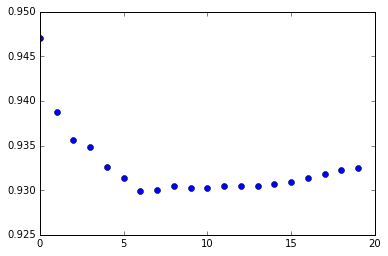

In [274]:
plt.plot(grid4.cv_results['param_n_factors'],grid4.cv_results['mean_test_rmse'],'o');

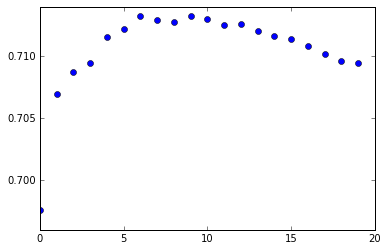

In [275]:
plt.plot(grid4.cv_results['param_n_factors'],grid4.cv_results['mean_test_fcp'],'o');

In [276]:
grid4.best_params,grid4.best_score

({'fcp': {'n_factors': 6}, 'rmse': {'n_factors': 6}},
 {'fcp': 0.7132335195607014, 'rmse': 0.9299526118124866})

In [283]:
'''This module runs a 5-Fold CV for all the algorithms (default parameters) on
the movielens datasets, and reports average RMSE, MAE, and total computation
time.  It is used for making tables in the README.md file'''

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import time
import datetime
import random

import numpy as np
import six
from tabulate import tabulate

from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# The algorithms to cross-validate
classes = (SVD,  poorman_SVD, BaselineOnly, NormalPredictor,NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline,
           CoClustering)

# set RNG
np.random.seed(0)
random.seed(0)

dataset = 'ml-100k'
data = Dataset.load_builtin(dataset)
kf = KFold(random_state=0)  # folds will be the same for all algorithms.

table = []
for klass in classes:
    print(klass.__name__)
    start = time.time()
    out = cross_validate(klass(), data, ['rmse', 'mae','fcp'], kf,n_jobs=1)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    mean_mae = '{:.3f}'.format(np.mean(out['test_mae']))
    mean_fcp = '{:.3f}'.format(np.mean(out['test_fcp']))

    new_line = [klass.__name__,mean_rmse, mean_mae, mean_fcp,cv_time]
    print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

header = ['Class','RMSE','MAE','FCP','Time']
print(tabulate(table, header, tablefmt="pipe"))

SVD
|:----|------:|------:|----:|:--------|
| SVD | 0.936 | 0.738 | 0.7 | 0:00:21 |
poorman_SVD
Estimating biases using als...
performing SVD with n_factors= 10
Estimating biases using als...
performing SVD with n_factors= 10
Estimating biases using als...
performing SVD with n_factors= 10
Estimating biases using als...
performing SVD with n_factors= 10
Estimating biases using als...
performing SVD with n_factors= 10
|:------------|------:|------:|-----:|:--------|
| poorman_SVD | 0.928 | 0.732 | 0.71 | 0:00:03 |
BaselineOnly
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
|:-------------|------:|------:|------:|:--------|
| BaselineOnly | 0.944 | 0.748 | 0.696 | 0:00:02 |
NormalPredictor
|:----------------|------:|------:|------:|:--------|
| NormalPredictor | 1.523 | 1.225 | 0.496 | 0:00:02 |
NMF
|:----|------:|------:|-----:|:--------|
| NMF | 0.963 | 0.757 | 0.69 | 0:00:26 |
S